#**Задание**
1. Оценить ${\rm E} n(\xi)$ с помощью МСМС для графа 8х8.

In [80]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

#пишем следующие функции: проверяем, что данный узел не нарушает условие на граф и проверяем, что граф в целом нам подходит
def cell_is_good(graph, row, column):
  if graph[row][column] == 0:
    return True

  if row > 0 and row < 7 and column > 0 and column < 7:
    if graph[row+1][column] == 0 and graph[row-1][column] == 0 and graph[row][column-1] == 0 and graph[row][column+1] == 0:
      return True
    else:
      return False

  if row == 0 and column == 0:
    if graph[row+1][column] == 0 and graph[row][column+1] == 0:
      return True
    else:
      return False

  if row == 0 and column == 7:
    if graph[row+1][column] == 0 and graph[row][column-1] == 0:
      return True
    else:
      return False

  if row == 7 and column == 0:
    if graph[row-1][column] == 0 and graph[row][column+1] == 0:
      return True
    else:
      return False

  if row == 7 and column == 7:
    if graph[row-1][column] == 0 and graph[row][column-1] == 0:
      return True
    else:
      return False
  
  if row == 0:
    if graph[row+1][column] == 0 and graph[row][column+1] == 0 and graph[row][column-1] == 0:
      return True
    else:
      return False

  if row == 7:
    if graph[row-1][column] == 0 and graph[row][column+1] == 0 and graph[row][column-1] == 0:
      return True
    else:
      return False

  if column == 0:
    if graph[row+1][column] == 0 and graph[row][column+1] == 0 and graph[row-1][column] == 0:
      return True
    else:
      return False

  if column == 7:
    if graph[row+1][column] == 0 and graph[row-1][column] == 0 and graph[row][column-1] == 0:
      return True
    else:
      return False

def graph_is_good(graph):
  for i in range(8):
    for j in range(8):
      if not cell_is_good(graph, i, j):
        return False

  return True

#теперь хотим уметь строить по графу "близкие" к нему и случайным образом выбирать из них следующий (близкий граф строим так: меняем одну ячейку старого графа. Если полученный граф 
#подходит, добавляем его в последовательность. Далее случайным образом выбираем из них новый граф.
#здесь близкие графы суть соседние города из задачи-примера

def next_graph(graph):
  sequence = []
  new_graph = graph.copy()

  for i in range(8):
    for j in range(8):
      new_graph[i][j] = abs(graph[i][j] - 1)
      
      if graph_is_good(new_graph):
        sequence.append(new_graph.copy())

      new_graph[i][j] = abs(new_graph[i][j] - 1)

  new_graph = rnd.choice(sequence)
  return new_graph, len(sequence)

def chain_step(graph):
  graph1, len1 = next_graph(graph)
  graph2, len2 = next_graph(graph1)

  q = min(1, len1/len2)

  bound = np.random.choice(np.array([0,1]), p=[1-q, q])
  if bound == 0:
    return graph

  return graph1

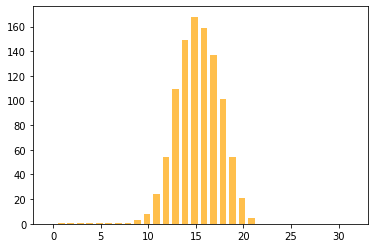

In [49]:
graph = np.zeros(64).reshape([8,8])
sum = 0
sequence = []

for i in range(1000):
  graph = chain_step(graph)
  sum = np.sum(graph)
  sequence.append(sum)

plt.hist(sequence, bins = np.arange(33)-0.5, width = 0.7, alpha = 0.7, color = "orange")
plt.show()

print("Оценка среднего числа черных вершин -- 15")


2. Обосновать численно и графически стационарность.

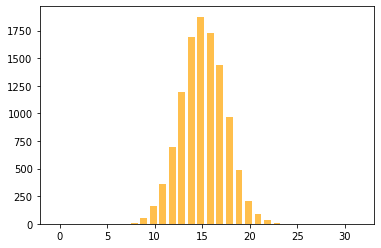

Оценка среднего значения черных вершин --  15.223


In [50]:
for i in range(10000):
  graph = chain_step(graph)
  sum = np.sum(graph)
  sequence.append(sum)

plt.hist(sequence, bins = np.arange(33)-0.5, width = 0.7, alpha = 0.7, color = "orange")
plt.show()

print("Среднего значения черных вершин -- ", np.mean(sequence))

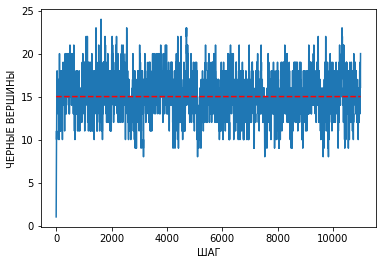

In [53]:
plt.plot(sequence)
plt.plot(np.arange(11000), 15*np.ones(11000), 'r--')
plt.xlabel("ШАГ")
plt.ylabel("ЧЕРНЫЕ ВЕРШИНЫ")
plt.show()

Видно, что после увеличения числа шагов, среднее значение черных вершин близко к оценке -- 15. Также на втором графике видно, что  с ростом числа шагов последовательность действительно стабилизируется около 15.


3. Построить график распределения $n(\xi)$.

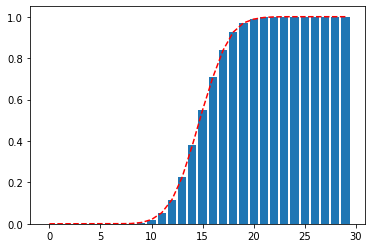

In [58]:
x_axis = np.zeros(30)
counter = 0

for i in range (30):
    for j in range (11000):
        if i == sequence[j]:
            counter += 1
    x_axis[i] = counter
    counter = 0

final = np.zeros(30)
final[0] = x_axis[0]

for i in range (1,30):
    final[i] = x_axis[i]+final[i-1]

final = final.astype(int) / 11000
plt.bar(np.arange(30), final)
plt.plot(np.arange(30),final, 'r--')
plt.show()

4. Изобразить раскраску для одного из случайных графов, взятых из стационарного распределения.

[[0. 1. 0. 0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 1. 0. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1.]]


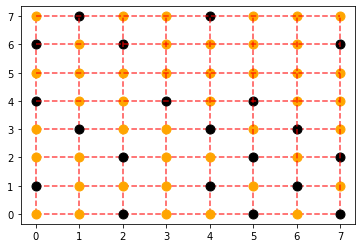

In [79]:
print(graph)

for i in range(8):
  plt.plot(np.arange(8), i*np.ones(8), 'r--', alpha = 0.7)
  plt.plot(i*np.ones(8), np.arange(8), 'r--', alpha = 0.7)
  for k in range(8):
    if graph[i][k] == 1:
      plt.plot(k,7-i, 'o', color = 'black', ms = 9)
    else:
      plt.plot(k,7-i, 'bo', color = 'orange', ms = 9)
plt.show()

Черные точки соответствуют черным вершинам (единицам), а оранжевые -- белым (нулям).